In [35]:
import pandas as pd
import matplotlib as plt

# Read the CSV file
data = pd.read_csv('netflix_titles.csv', encoding='ISO-8859-1')

# Store the data in a variable
data = data

# Remove all columns that are unnamed
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]


# Display it
print(data)




     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   
8807   s8808  TV Show     Parasyte: The Grey     Yeon Sang-ho   
8808   s8809    Movie                 Serena     Susanne Bier   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [39]:

# Filter for South Korean movies
south_korean_movies = data[(data['country'] == 'South Korea') & (data['type'] == 'Movie')]

# Display the titles of these movies
print(south_korean_movies[['title', 'release_year']]).unique()

                                   title  release_year
556                        The 8th Night          2021
762                         Sweet & Sour          2021
1085                   Night in Paradise          2021
1342                      Space Sweepers          2021
1412                            Wish You          2021
1468           What Happened to Mr. Cha?          2021
1643                            The Call          2020
2036                              #Alive          2020
2215              The Larva Island Movie          2020
2410  The Witch: Part 1 - The Subversion          2018
2650                        Time to Hunt          2020
3308                    Tune in for Love          2019
3419        Park Na-rae: Glamour Warning          2019
3793             Svaha: The Sixth Finger          2019
3865         Jo Pil-ho: The Dawning Rage          2018
4091                       The Drug King          2018
4154                        High Society          2018
4192      

AttributeError: 'NoneType' object has no attribute 'unique'

<Axes: title={'center': 'Number of Movies per Year'}, xlabel='release_year'>

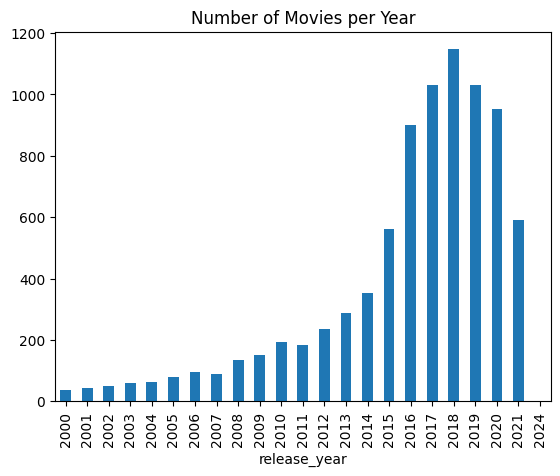

In [40]:
# Create a table of the number of movies per year
movies_per_year = data['release_year'].value_counts().reset_index()
movies_per_year.columns = ['release_year', 'number_of_movies']
# Sort the table by year
movies_per_year = movies_per_year.sort_values(by='release_year')
# remove all years before 2000
movies_per_year = movies_per_year[movies_per_year['release_year'] >= 2000]
# display the information in a graph
movies_per_year.plot(x='release_year', y='number_of_movies', kind='bar', legend=False, title='Number of Movies per Year')


<Axes: title={'center': 'Most Popular Genres in the Dataset'}, ylabel='number_of_movies'>

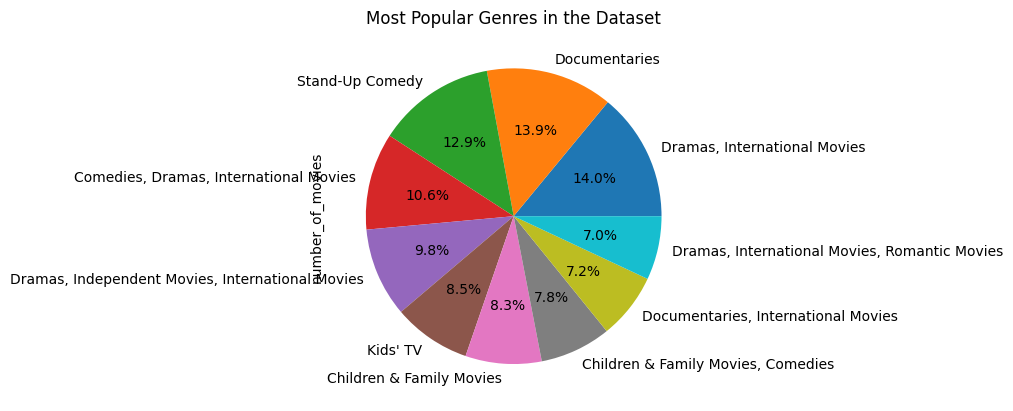

In [44]:
# Create a table of the most popular genres in the dataset
genres = data['listed_in'].value_counts().reset_index()
genres.columns = ['genre', 'number_of_movies']
# Create a pie chart of the most popular genres
genres = genres.head(10)
genres.plot.pie(y='number_of_movies', labels=genres['genre'], autopct='%1.1f%%', legend=False, title='Most Popular Genres in the Dataset')


           word  count
1961  christmas     77
242       story     73
246        life     71
164       black     53
531    american     53
93        house     49
734        live     45
1060      power     43
365       super     43
190       night     38
392      family     35
389        high     34
484       girls     34
327         war     34
479        good     33
1494      first     33
910     rangers     32
600         boy     31
485     monster     31
248         big     30
450      secret     29
309      school     29
61         dark     29
15        great     28
83       chhota     27
1571        bad     27
1246       days     26
1243    special     25
84        bheem     25
123      legend     25
779        back     25
151       space     25
395       happy     25
1162       baby     24
1209      ghost     24
1399       wild     24
109        fire     24
1546    secrets     23
838       tales     23
815      killer     23


<Axes: title={'center': 'Most Common Words in Movie Titles'}, xlabel='word'>

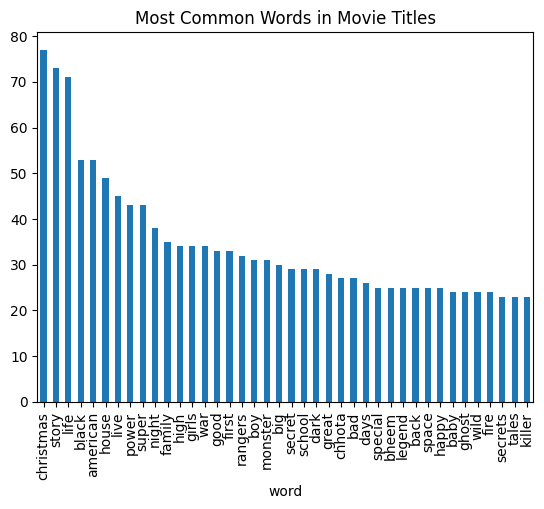

In [58]:
# Create a table of the most common words within all movie titles
from collections import Counter
import re
words = Counter()
for title in data['title']:
	for word in title.split():
		words[word] += 1
  
# Remove all words that are less than 3 characters long
words = {k: v for k, v in words.items() if len(k) > 2}
# Remove all words that are not alphabetic
words = {k: v for k, v in words.items() if k.isalpha()}
# Turn all words into lowercase
words = {k.lower(): v for k, v in words.items()}
# Remove all words that are common words
common_words = ['the', 'You', 'The', 'and', 'for', 'with', 'from', 'are', 'you', 'your', 'that', 'this', 'have', 'has', 'was', 'not', 'but', 'all', 'can', 'out', 'get', 'one', 'two', 'new', 'how', 'why', 'who', 'what', 'where', 'when', 'which', 'will', 'would', 'should', 'could', 'might', 'may', 'must', 'shall', 'than', 'then', 'now', 'also', 'more', 'most', 'some', 'any', 'many', 'few', 'each', 'every', 'own', 'other', 'another']
words = {k: v for k, v in words.items() if k not in common_words}
# Create a table of the most common words
words = pd.DataFrame(words.items(), columns=['word', 'count'])
# Sort the table by count
words = words.sort_values(by='count', ascending=False)
# Remove any words that appear less than 10 times
words = words[words['count'] >= 10]
# Display the table
print(words.head(40))
# Create a bar chart of the most common words
words.head(40).plot(x='word', y='count', kind='bar', legend=False, title='Most Common Words in Movie Titles')
